# Parcial 3: 
### Curso: Metodos computacionales 
### Profesor: Hernán David Salinas Jiménez


La entrega del examen se debe realizar a traves del git-hub en el directorio de cada estudiante.


In [290]:
#Librerias 
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.special import ellipk
from scipy import linalg



# Ecuaciones diferenciales


## Body Planet Orbits
1. (33%) Newton’s explanation of the motion of the planets in terms of a universal law of gravitation is one of the great achievements of science. He was able to prove that the planets traveled along elliptical paths with the sun at one vertex and to predict periods of the motion accurately. All Newton needed to postulate was that the force between a planet of mass $m$ and the sun of mass $M$ is

\begin{equation}
F^{(g)} = -\frac{GmM}{r^2}
\end{equation}

Here $r$ is the planet-CM distance, $G$ is the universal gravitational constant, and the attractive force lies along the line connecting the planet and the sun. The hard part for Newton was solving the resulting differential equations because he had to invent calculus to do it and then had go through numerous analytic manipulations. The numerical solution is straightforward since even for planets the equation of motion is still

\begin{equation}
\vec{f}=m\vec{a} = m \frac{\mathrm{d}^2\vec{r}}{\mathrm{d}t^2}
\end{equation}

with the force having components:

\begin{equation}
f_x  = F^{(g)}\cos \theta =  F^{(g)}\frac{x}{r}
\end{equation}


\begin{equation}
f_y  = F^{(g)}\sin \theta =  F^{(g)}\frac{y}{r}
\end{equation}

where 

\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}



The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.



a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

In [291]:
# Definimos las ecuaciones diferenciales acopladas que serán resueltas por el método odeint
def ED(vector, t, args):
    x, y, vx, vy = vector
    G, M = args
    r = np.sqrt(x**2 + y**2)
    return [vx, vy, -G*M*(x/r**3), -G*M*(y/r**3)]

# Definimos las condiciones iniciales
G = 1
M = 1
x0 = 0.5
y0 = 0
vx0 = 0
vy0 = 1.63

# Definimos el tiempo de integración
t = np.linspace(0, 10, 1000)

# Definimos el vector de condiciones iniciales
vector = [x0, y0, vx0, vy0]

# Definimos el vector de parámetros
args = ([G, M],)

# Resolvemos el sistema de ecuaciones diferenciales acopladas
solucion = odeint(ED, vector, t, args)

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.



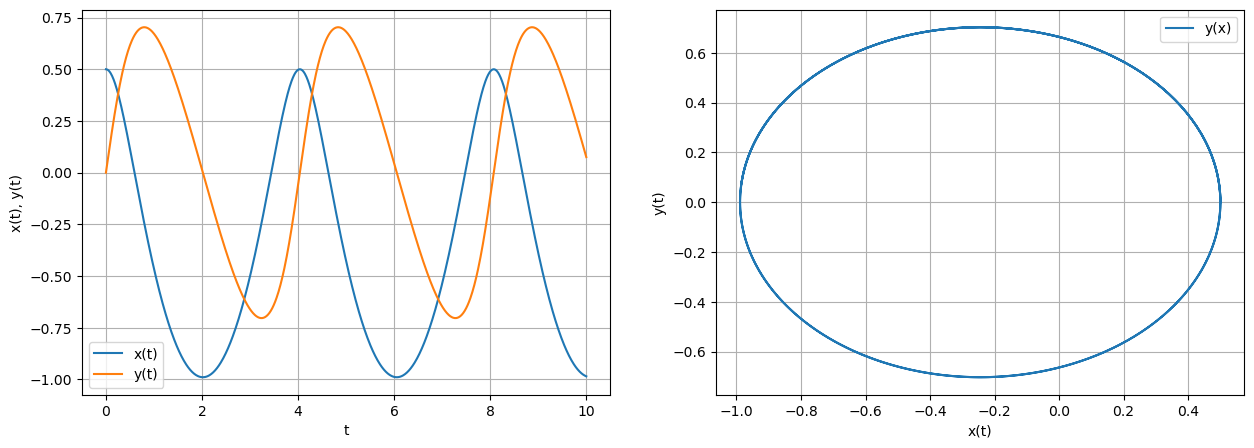

In [292]:
# Graficamos la solución
fig , axs = plt.subplots(1,2,figsize=(15,5))
ax = axs.flatten()

ax[0].plot(t, solucion[:,0], label='x(t)')
ax[0].plot(t, solucion[:,1], label='y(t)')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x(t), y(t)')
ax[0].grid()
ax[0].legend()

ax[1].plot(solucion[:,0], solucion[:,1], label='y(x)')
ax[1].set_xlabel('x(t)')
ax[1].set_ylabel('y(t)')
ax[1].grid()
ax[1].legend()

plt.show()

Por tanto, las condiciones iniciales con las que resolvimos la ecuación diferencial corresponde a un movimiento periodico tanto en x(t) como en y(t), lo que da como resultado una órbita elíptica que se mueve sobre un plano. 

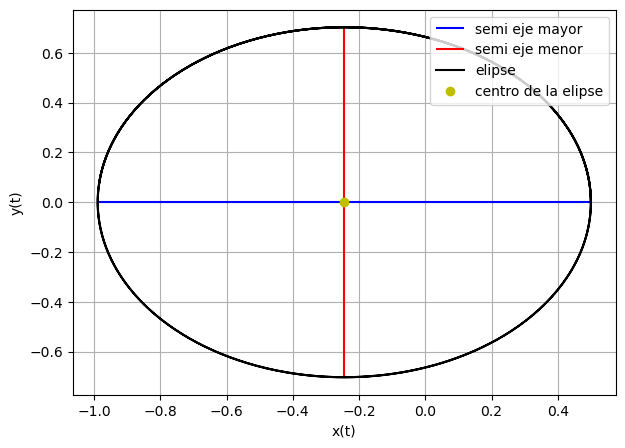

In [293]:
# econtremos los semi ejes mayores y menores de la elipse

#semi eje mayor
a = (max(solucion[:,0]) - min(solucion[:,0]))/2

#semi eje menor
b = (max(solucion[:,1]) - min(solucion[:,1]))/2

#centro de la elipse
x0 = (max(solucion[:,0]) + min(solucion[:,0]))/2
y0 = (max(solucion[:,1]) + min(solucion[:,1]))/2

# ahora trazamos los semi ejes y el centro en la grafica de la elipse
fig , ax = plt.subplots(figsize=(7,5))
ax.hlines(y0, -a+x0, x0+a, color='b', label='semi eje mayor')
ax.vlines(x0, -b+y0, y0+b, color='r', label='semi eje menor')
ax.plot(solucion[:,0], solucion[:,1],'k', label='elipse')
ax.plot(x0,y0,'yo', label='centro de la elipse')
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.legend(loc='upper right')
ax.grid()


### Integracion 
2. (33%) Las [integrales elipticas](https://es.wikipedia.org/wiki/Integral_el%C3%ADptica#:~:text=Una%20integral%20el%C3%ADptica%20de%20primera,segundas%20dependen%20de%20dos%20variables) son integrales que permite dar solución a múltiples problemas en física y matemáticas. Algunos ejemplos de su uso, pueden ser encontrados en las siguientes referencias [[1]](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html)
[[2]](http://www.sc.ehu.es/sbweb/fisica_/numerico/integral/eliptica_ejemplos.html). El siguiente problema esta relacionado con al integración eliptica.


La [longitud de arco](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html) de  una elipse puede ser calculada a través de la siguiente integral.

\begin{equation}
L(k) = 4a\int_0^{\pi/2}  \mathrm{d} \phi \sqrt{1-k^2\sin^2 \phi}
\end{equation}

donde $ k^2 = \frac{a^2-b^2}{a^2} = \epsilon $, siendo $\epsilon$ la excentricidad de la elipse, a y b el semieje mayor y menor de la elipse respectivamente, $a>b$.

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

2. Determine la longitud de arco de la solucion del problema 1.

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

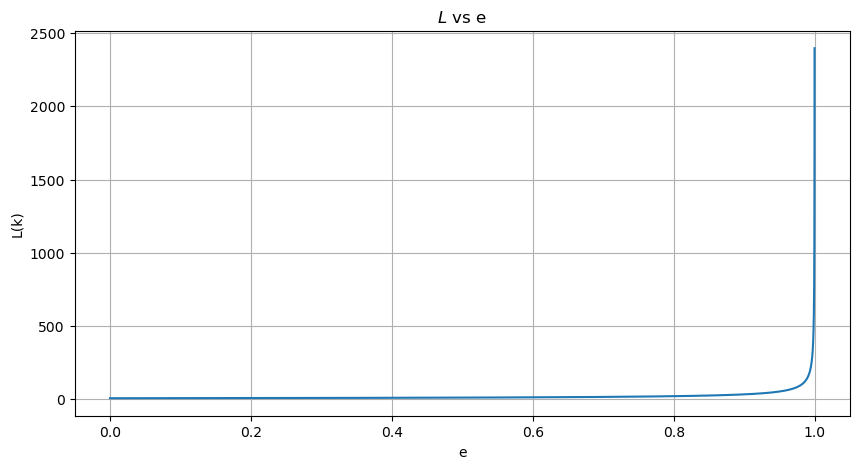

In [294]:
# Tenemos que L(k) es una integral eliptica de primera especie, por lo que utilizaremos la función ellipk de scipy 
L = lambda a,k: 4*a*ellipk(k)
k2 = lambda a,b: (a**2 - b**2)/a**2 

#parametros
b = 1
a = np.linspace(1,100,2000)
e = k2(a,b)
L = L(a,e)

#graficamos
fig , ax = plt.subplots(figsize=(10,5))
ax.plot(e,L)
ax.set_xlabel('e')
ax.set_ylabel('L(k)')
ax.set_title(r'$L$ vs e')
ax.grid()


2. Determine la longitud de arco de la solucion del problema 1.

In [295]:

# econtremos los semi ejes mayores y menores de la elipse

#semi eje mayor
a = (max(solucion[:,0]) - min(solucion[:,0]))/2

#semi eje menor
b = (max(solucion[:,1]) - min(solucion[:,1]))/2

#excetricidad
e = (a**2 - b**2)/a**2

#longitud de arco de la elipse del problema 1
L = 4*a*ellipk(e)

print('la longitud de arco de la elipse del problema 1 es:')
print(L)


la longitud de arco de la elipse del problema 1 es:
4.812575478045785



### Matrices: Rotación  en el plano, autovalores y autovectores
3 (33%).   Considere la siguiente matrix de rotación:
\begin{bmatrix} 
\cos \theta & -\sin \theta\\ 
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución. 

Encontrar los autovalores y autovectores para $\theta=45$.

In [296]:
#Definimos la matriz de rotación en 2D como una matriz simbólica

theta = sp.symbols('theta')
A = sp.Matrix([[sp.cos(theta), -sp.sin(theta)],[sp.sin(theta), sp.cos(theta)]])
A


Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

a) Encontrar el polinomio característico de A

In [297]:
print('El polinomio caracteristico es:')

#calculamos el polinomio caracteristico de la matriz A
sp.factor(A.charpoly().as_expr())

El polinomio caracteristico es:


lambda**2 - 2*lambda*cos(theta) + 1

b) Encontrar los autovalores y autovectores para $\theta=45$.


In [298]:
#convertimos a matriz numerica
A = np.array(A.subs(theta,45)).astype(np.float64)

#calculamos los autovalores y autovectores
autovalores = linalg.eig(A)[0]
autovectores = linalg.eig(A)[1]

print('---'*15)
print(r'Los autovalores cuando $\theta = 45$ son:')
print('---'*15)
print()
print(autovalores)

print()
print('---'*15)
print(r'Los autovectores cuando $\theta = 45$ son:')
print('---'*15)
print()
print(autovectores)

---------------------------------------------
Los autovalores cuando $\theta = 45$ son:
---------------------------------------------

[0.52532199+0.85090352j 0.52532199-0.85090352j]

---------------------------------------------
Los autovectores cuando $\theta = 45$ son:
---------------------------------------------

[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución.

In [299]:
#construya la matriz diagonal con los autovalores y autovectores y compruebe su solución.

#para theta arbitrario utilizamos sympy para diagonalizar la matriz A 
theta = sp.symbols('theta')
Ag = sp.Matrix([[sp.cos(theta), -sp.sin(theta)],[sp.sin(theta), sp.cos(theta)]]) #A general

#Diagonalizamos la matriz A
P, D = Ag.diagonalize()
P.simplify()
D.simplify()

print('---'*10)
print('La matriz de autovectores es:')
print('---'*10)
print()
P # matriz de autovectores

------------------------------
La matriz de autovectores es:
------------------------------



Matrix([
[sin(theta)/sqrt(-sin(theta)**2), -sin(theta)/sqrt(-sin(theta)**2)],
[                              1,                                1]])

In [300]:
print('---'*10)
print(r'La matriz de autovectores es:')
print('---'*10)
print()
D # matriz diagonal de autovalores

------------------------------
La matriz de autovectores es:
------------------------------



Matrix([
[-sqrt(-sin(theta)**2) + cos(theta),                                 0],
[                                 0, sqrt(-sin(theta)**2) + cos(theta)]])

In [301]:
P.inv() # matriz inversa de autovectores

Matrix([
[ sqrt(-sin(theta)**2)/(2*sin(theta)), 1/2],
[-sqrt(-sin(theta)**2)/(2*sin(theta)), 1/2]])

In [302]:
Ag_diag = P@D@P.inv() # comprobamos que la diagonalización es correcta
Ag_diag.simplify()
Ag_diag

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

In [303]:
#para theta = 45 utilizamos numpy para diagonalizar la matriz A
A 

array([[ 0.52532199, -0.85090352],
       [ 0.85090352,  0.52532199]])

In [304]:
#Diagonalizamos la matriz A
P, D = linalg.eig(A)[1], np.diag(linalg.eig(A)[0])

print('---'*10)
print('La matriz de autovectores es:')
print('---'*10)
print()
print(P) # matriz de autovectores

------------------------------
La matriz de autovectores es:
------------------------------

[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [305]:
print('---'*10)
print('La matriz de autovectores es:')
print('---'*10)
print()
print(D) # matriz diagonal de autovalores

------------------------------
La matriz de autovectores es:
------------------------------

[[0.52532199+0.85090352j 0.        +0.j        ]
 [0.        +0.j         0.52532199-0.85090352j]]


In [306]:
#calculamos la matriz inversa de autovectores
P_inv = linalg.inv(P)

#comprobamos que la diagonalización es correcta
A_diag = P@D@P_inv
A_diag

array([[ 0.52532199-2.26361911e-17j, -0.85090352+2.43277595e-18j],
       [ 0.85090352-2.43277595e-18j,  0.52532199-2.26361911e-17j]])